# 

### Dependencies

In [6]:
from classification import *

import numpy as np
import scipy
import scipy.integrate
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import pandas as pd
from tqdm import tqdm
import proplot as pplt
import itertools
import os
from ip3_ca_ode_cfg import *
import cfg

def color_cycle(cycle='default', idx=None):
    # Colors to assign to auxiliary tasks (they will be assigned in order)
    colors = pplt.Cycle(cycle).by_key()['color']
    hex_to_rgb = lambda h: tuple(int(h.lstrip('#')[i:i+2], 16) for i in (0, 2, 4))
    rgb_colors = np.array([hex_to_rgb(color) for color in colors])/255
    
    if idx is not None:
        return rgb_colors[idx]
    else:
        return rgb_colors
    
rgb_colors = color_cycle()

diversity_fig_folder = 'figures/paper_plots/diversity/'
folder = 'data/ca_diversity/blocking/'

# Data Collection

## Varying kd1, kd2, v_-, v_+

In [9]:
conditions = {
    'kd1': [0, 0.02, 0.04],
    'kd2': [0, 0.6, 1.2, 2.4],
    'v_3k': [0, 0.05, 0.1, 0.2],
    'v_delta': [0, 0.0025, 0.005, 0.01, 0.02],
#     'v_pmca': [5, 8, 10],
#     'v_soc': [0, 0.75, 0.157],
#     'v_serca': [0, 0.45, 0.9]
}

t_f = 150
results_rows = []
trial_count = 0
peak_priority = True

folder = 'data/ca_diversity/calibrated/'

combs = list(itertools.product([0.02], [1.2], conditions['v_3k'], conditions['v_delta'])) + \
        list(itertools.product(conditions['kd1'], conditions['kd2'], [0.1], [0.005]))
# for comb in itertools.product(conditions['kd1'], conditions['kd2'], conditions['v_3k'], conditions['v_delta']):

for comb in combs:
    cfg.kd1 = comb[0]
    cfg.kd2 = comb[1]
    cfg.v_3k = comb[2]
    cfg.v_delta = comb[3]
    
    file = f'kd1_{cfg.kd1}_kd2_{cfg.kd2}_v3k_{cfg.v_3k}_vdelta_{cfg.v_delta}'
    print(file)
    if file in os.listdir(folder):
        continue
    results_rows = diversity_experiment(calibrate=5, suite=2)
    
    results = pd.DataFrame(results_rows)
    results.to_pickle(folder + file)

cfg.kd1 = 0.02
cfg.kd2 = 1.2
cfg.v_3k = 0.1
cfg.v_delta = 0.005
set_init('default')
# diversity_barchart(results)

kd1_0.02_kd2_1.2_v3k_0_vdelta_0
kd1_0.02_kd2_1.2_v3k_0_vdelta_0.0025
kd1_0.02_kd2_1.2_v3k_0_vdelta_0.005
kd1_0.02_kd2_1.2_v3k_0_vdelta_0.01
kd1_0.02_kd2_1.2_v3k_0_vdelta_0.02
kd1_0.02_kd2_1.2_v3k_0.05_vdelta_0
kd1_0.02_kd2_1.2_v3k_0.05_vdelta_0.0025
kd1_0.02_kd2_1.2_v3k_0.05_vdelta_0.005
kd1_0.02_kd2_1.2_v3k_0.05_vdelta_0.01
kd1_0.02_kd2_1.2_v3k_0.05_vdelta_0.02
kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0
kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0.0025
kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0.005
kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0.01
kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0.02
kd1_0.02_kd2_1.2_v3k_0.2_vdelta_0
kd1_0.02_kd2_1.2_v3k_0.2_vdelta_0.0025
kd1_0.02_kd2_1.2_v3k_0.2_vdelta_0.005
kd1_0.02_kd2_1.2_v3k_0.2_vdelta_0.01
kd1_0.02_kd2_1.2_v3k_0.2_vdelta_0.02
kd1_0_kd2_0_v3k_0.1_vdelta_0.005
kd1_0_kd2_0.6_v3k_0.1_vdelta_0.005
kd1_0_kd2_1.2_v3k_0.1_vdelta_0.005
kd1_0_kd2_2.4_v3k_0.1_vdelta_0.005
kd1_0.02_kd2_0_v3k_0.1_vdelta_0.005
kd1_0.02_kd2_0.6_v3k_0.1_vdelta_0.005
kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0.005
kd1_0.02_kd2_2.

## Varying Channel Properties SOC and SERCA

In [14]:
cfg.v_soc = 1.57
cfg.v_serca = 0.9
cfg.v_pmca = 10.0
set_init('default')

multipliers = np.array([0.7, 1.0, 1.3])

conditions = {
    'v_soc': multipliers * cfg.v_soc,
    'v_serca': multipliers * cfg.v_serca,
    'v_pmca': multipliers * cfg.v_pmca
}
t_f = 150

folder = 'data/ca_diversity/channels/'

combs = list(itertools.product(conditions['v_soc'], conditions['v_serca'], conditions['v_pmca']))

for comb in combs:
    cfg.v_soc = comb[0]
    cfg.v_serca = comb[1]
    cfg.v_pmca = comb[2]
    
    file = 'vsoc_{}_vserca_{}_vpmca_{}'.format(cfg.v_soc, cfg.v_serca, cfg.v_pmca)
    print(file)
    if file in os.listdir(folder):
        continue
    results_rows = diversity_experiment(calibrate=5, suite=2)
    
    results = pd.DataFrame(results_rows)
    results.to_pickle(folder + file)

cfg.v_soc = 1.57
cfg.v_serca = 0.9
cfg.v_pmca = 10.0
set_init('default')
# diversity_barchart(results)

vsoc_1.099_vserca_0.63_vpmca_7.0
vsoc_1.099_vserca_0.63_vpmca_10.0
vsoc_1.099_vserca_0.63_vpmca_13.0
vsoc_1.099_vserca_0.9_vpmca_7.0
vsoc_1.099_vserca_0.9_vpmca_10.0
vsoc_1.099_vserca_0.9_vpmca_13.0
vsoc_1.099_vserca_1.1700000000000002_vpmca_7.0
vsoc_1.099_vserca_1.1700000000000002_vpmca_10.0
vsoc_1.099_vserca_1.1700000000000002_vpmca_13.0
vsoc_1.57_vserca_0.63_vpmca_7.0
vsoc_1.57_vserca_0.63_vpmca_10.0
vsoc_1.57_vserca_0.63_vpmca_13.0
vsoc_1.57_vserca_0.9_vpmca_7.0
vsoc_1.57_vserca_0.9_vpmca_10.0
vsoc_1.57_vserca_0.9_vpmca_13.0
vsoc_1.57_vserca_1.1700000000000002_vpmca_7.0
vsoc_1.57_vserca_1.1700000000000002_vpmca_10.0
vsoc_1.57_vserca_1.1700000000000002_vpmca_13.0
vsoc_2.0410000000000004_vserca_0.63_vpmca_7.0
vsoc_2.0410000000000004_vserca_0.63_vpmca_10.0
vsoc_2.0410000000000004_vserca_0.63_vpmca_13.0
vsoc_2.0410000000000004_vserca_0.9_vpmca_7.0
vsoc_2.0410000000000004_vserca_0.9_vpmca_10.0
vsoc_2.0410000000000004_vserca_0.9_vpmca_13.0
vsoc_2.0410000000000004_vserca_1.170000000000000

## Channel Blocking

In [11]:
files = ['default', 'soc_0', 'pmca_0', 'serca_0.5']
folder = 'data/ca_diversity/blocking/'
for file in files:
    cfg.v_soc = 1.57
    cfg.v_serca = 0.9
    cfg.v_pmca = 10.0
    set_init('default')
    
    if file == 'soc_0':
        cfg.v_soc = 0
    elif file == 'pmca_0':
        cfg.v_pmca = 0
    elif file == 'serca_0.5':
        cfg.v_serca = 0.45
    
    print(file)
    # if file in os.listdir(folder):
    #     continue
    results_rows = diversity_experiment(calibrate=5, suite=2)
    
    results = pd.DataFrame(results_rows)
    results.to_pickle(folder + file)

cfg.v_soc = 1.57
cfg.v_serca = 0.9
cfg.v_pmca = 10.0
set_init('default')


default
soc_0
pmca_0
serca_0.5


# Plots

## Example canonical trajectory types

'MP'

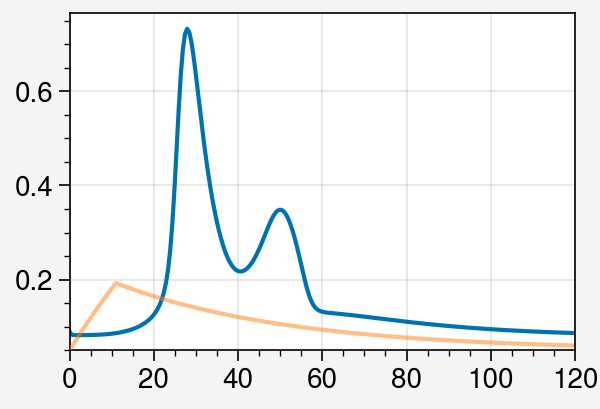

In [9]:
set_init('c_t')
fig, ax = pplt.subplots(refaspect=1.5, figwidth=3)

ox = ax.alty()

cfg.A = 2
cfg.d_decay = 220
cfg.d_rise = 41
cfg.r_decay = compute_r_decay(cfg.A, cfg.d_decay)
cfg.r_rise = 0.09

curve = glut_curves['MP']
cfg.A = curve['A']
cfg.d_decay = curve['d_decay']
cfg.d_rise = curve['d_rise']
cfg.r_decay = curve['r_decay']
cfg.r_rise = curve['r_rise']

sol = run_experiment('curve', t_f=120, max_step=0.5)

ax.plot(cfg.t, cfg.c)
ox.plot(cfg.t_input, cfg.glut, c=rgb_colors[1], alpha=0.5)

# ax.format(ylabel=c_label)
# ox.format(ylabel='$\phi$')

ox.format(ylim=[0, 5], yticks=[])
calcium_response_classification(cfg.t, cfg.c)

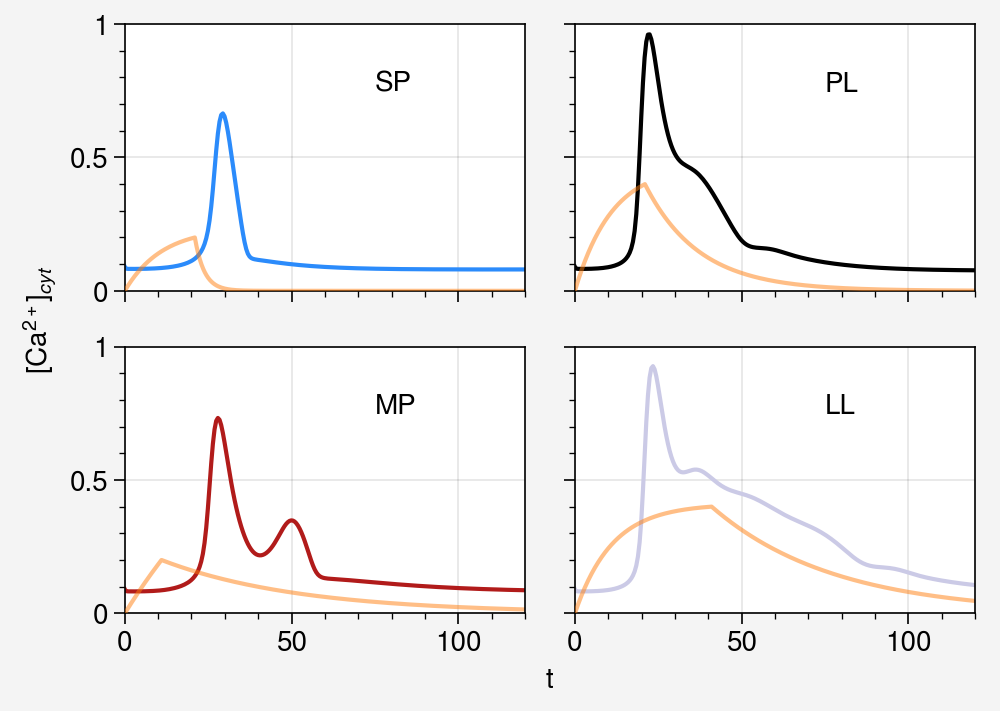

In [5]:
resp_types = ['SP', 'PL', 'MP', 'LL']
set_init('c_t')

fig, ax = pplt.subplots(ncols=2, nrows=2, refaspect=1.5, figwidth=5,
                        spanx=True, spany=True)
ox = ax.alty()

for i, typ in enumerate(resp_types):
    curve = glut_curves[typ]
    cfg.A = curve['A']
    cfg.d_decay = curve['d_decay']
    cfg.d_rise = curve['d_rise']
    cfg.r_decay = curve['r_decay']
    cfg.r_rise = curve['r_rise']
    
    sol = run_experiment('curve', t_f=120, max_step=0.5)
    ax[i].plot(cfg.t, cfg.c, c=diversity_colors[typ])
    ox[i].plot(cfg.t_input, cfg.glut, c=rgb_colors[1], alpha=0.5)
    
    ax[i].text(75, 0.75, typ)
    
ax.format(ylim=[0, 1], xlabel='t', ylabel=c_label, yticks=[0, 0.5, 1])
ox.format(ylim=[0, 5], yticks=[])



## Checking validity of test suite

Given a set of trials of glutamate inputs, track the corresponding IP3 inputs and diversity to see if they are comparable to previous paper results

### Calcium dotplot

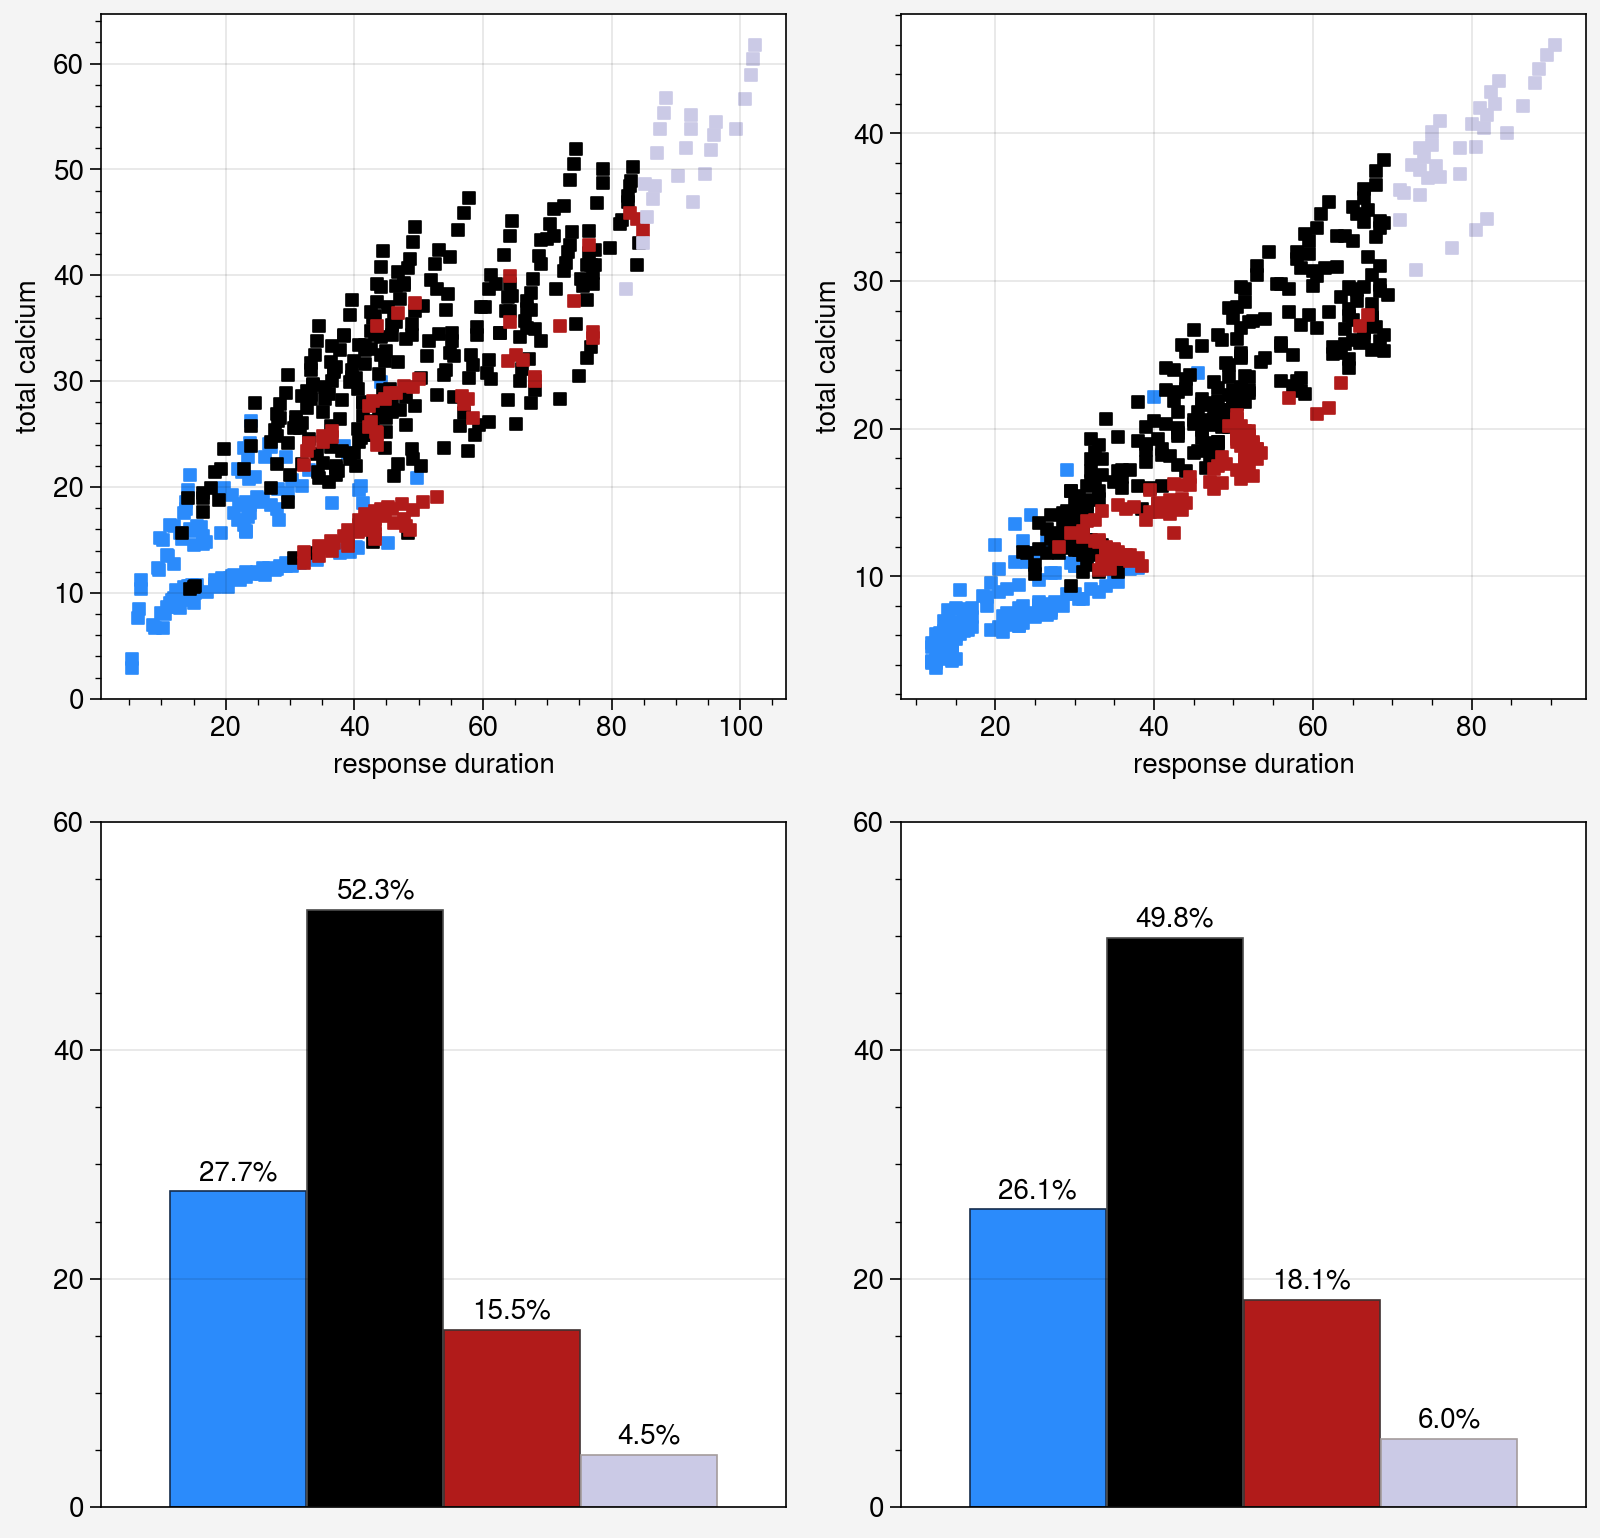

In [15]:
ip3_results = pd.read_pickle('data/ca_diversity/ip3/default')
glut_results = pd.read_pickle('data/ca_diversity/blocking/default')

fig, ax = pplt.subplots(nrows=2, ncols=2, figwidth=8, sharex=False, sharey=False)

diversity_dotplot(ip3_results, ax=ax[0, 0], legend=False)
diversity_dotplot(glut_results, ax=ax[0, 1], legend=False)
diversity_barchart(ip3_results, ax=ax[1, 0], fontsize=10, legend=False)
diversity_barchart(glut_results, ax=ax[1, 1], fontsize=10, legend=False)

### IP3 dotplots

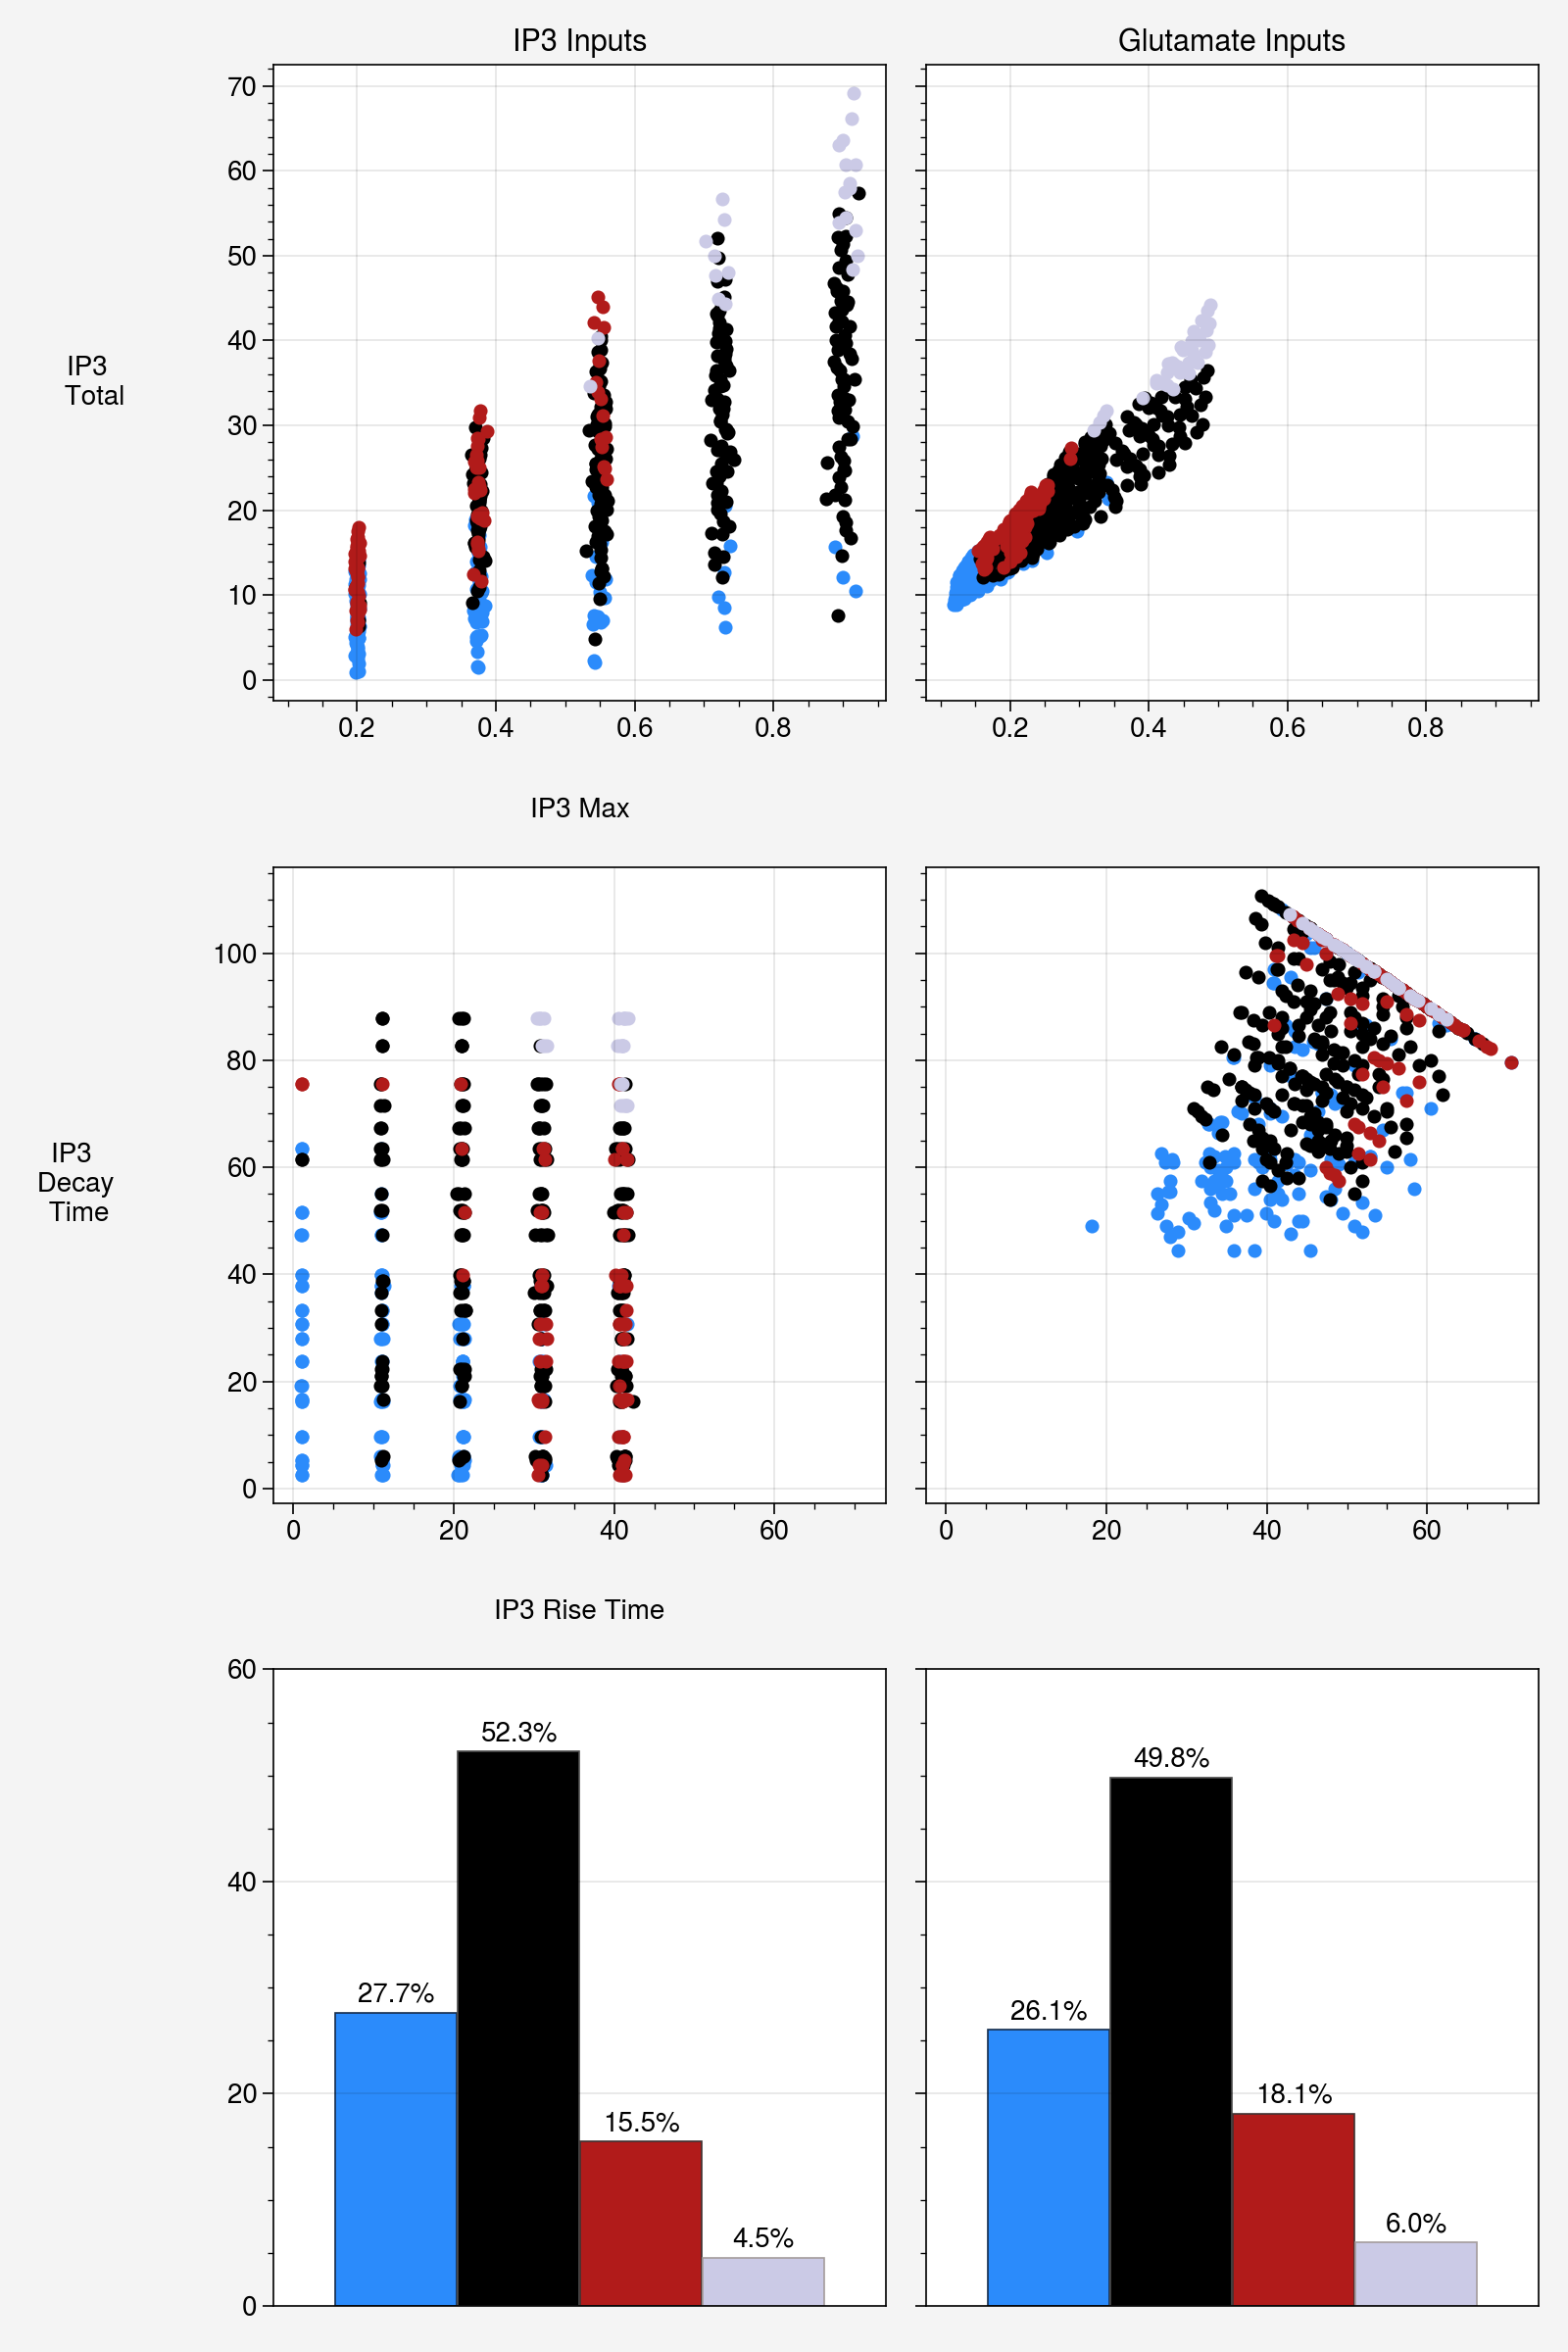

In [6]:
ip3_results = pd.read_pickle('data/ca_diversity/ip3/default')
# glut_results = pd.read_pickle('data/ca_diversity/calibrated/kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0.005')
glut_results = pd.read_pickle('data/ca_diversity/blocking/default')
# glut_results = res_df

fig, ax = plt.subplots(3, 2, figsize=(8, 12), sharey='row', sharex='row')
plot_intermediate_characteristics(ip3_results, ax=ax[0, 0], wiggle=True)
plot_intermediate_characteristics(glut_results, ax=ax[0, 1])
plot_intermediate_characteristics(ip3_results, typ='shape', ax=ax[1, 0], wiggle=True)
plot_intermediate_characteristics(glut_results, typ='shape', ax=ax[1, 1])


ax[0, 0].set_title('IP3 Inputs')
ax[0, 1].set_title('Glutamate Inputs')

ax[0, 0].set_xlabel('IP3 Max', labelpad=20)
ax[0, 0].set_ylabel('IP3 \n Total', rotation=0, labelpad=50, va='center', ha='center')

ax[1, 0].set_xlabel('IP3 Rise Time', labelpad=20)
ax[1, 0].set_ylabel('IP3 \n Decay \n Time', rotation=0, labelpad=50, va='center', ha='center')


diversity_barchart(ip3_results, ax=ax[2, 0], legend=False, fontsize=10)
diversity_barchart(glut_results, ax=ax[2, 1], legend=False, fontsize=10)

plt.tight_layout()
# plt.savefig(diversity_fig_folder + 'ip3_glut_confirmation', bbox_inches='tight')

## Channel Blocking Confirmation

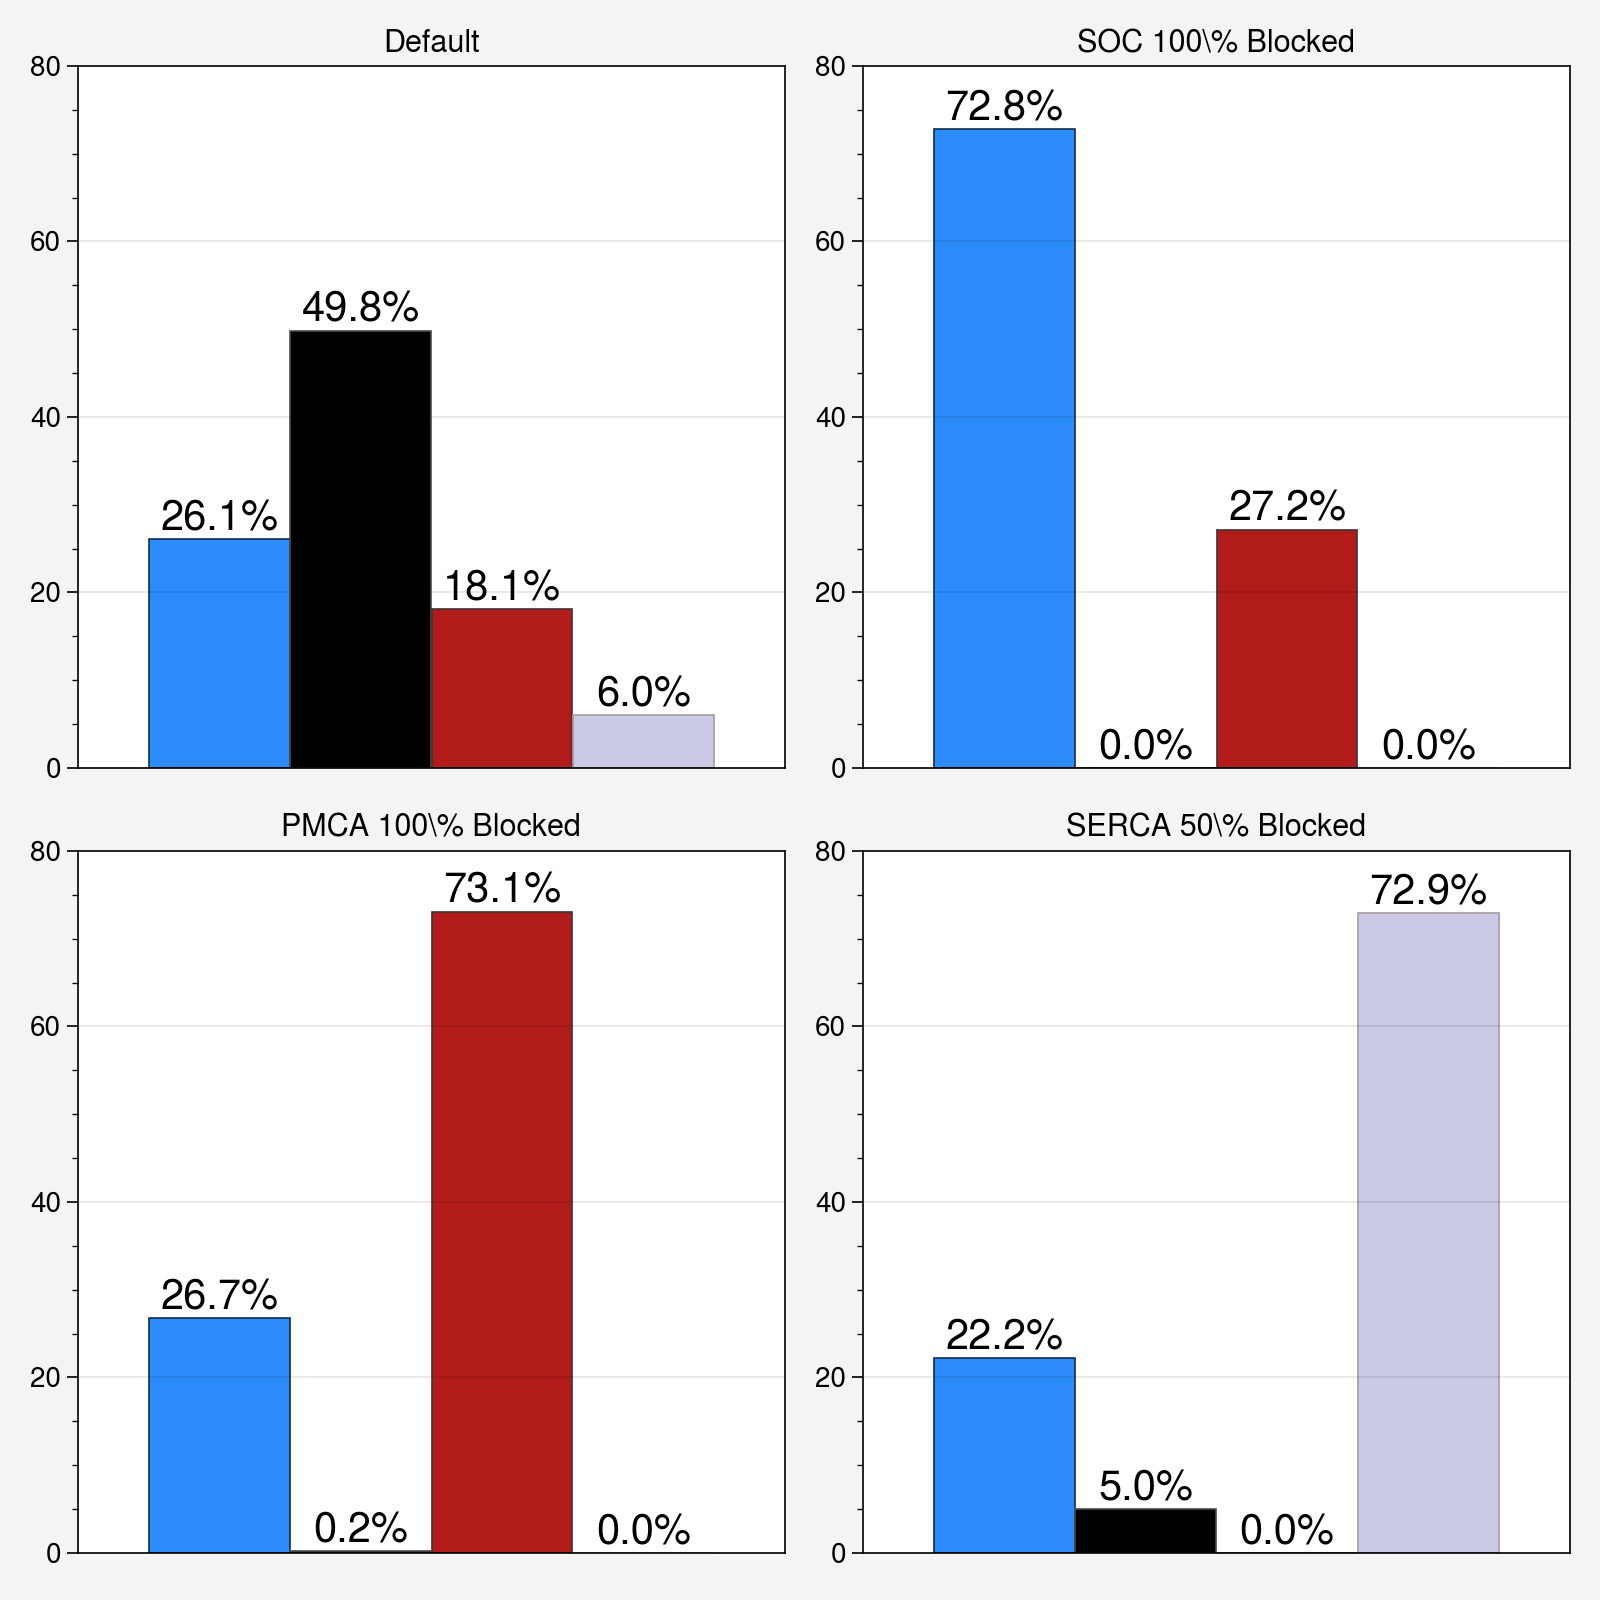

In [7]:
files = ['default', 'soc_0', 'pmca_0', 'serca_0.5']
titles = ['Default', 'SOC 100\% Blocked', 'PMCA 100\% Blocked', 'SERCA 50\% Blocked']

folder = 'data/ca_diversity/blocking/'

fig, ax = plt.subplots(2, 2, figsize=(8, 8))

for i, file in enumerate(files):
    n = i % 2
    m = int(np.floor(i / 2))
    
    results = pd.read_pickle(folder + file)
    diversity_barchart(results, ax=ax[m, n], legend=False, ylim=80, fontsize=15)
    
    ax[m, n].set_title(titles[i])
    
plt.tight_layout()
# plt.savefig(diversity_fig_folder + 'channel_block_confirmation', bbox_inches='tight')

## Varying SOC and SERCA

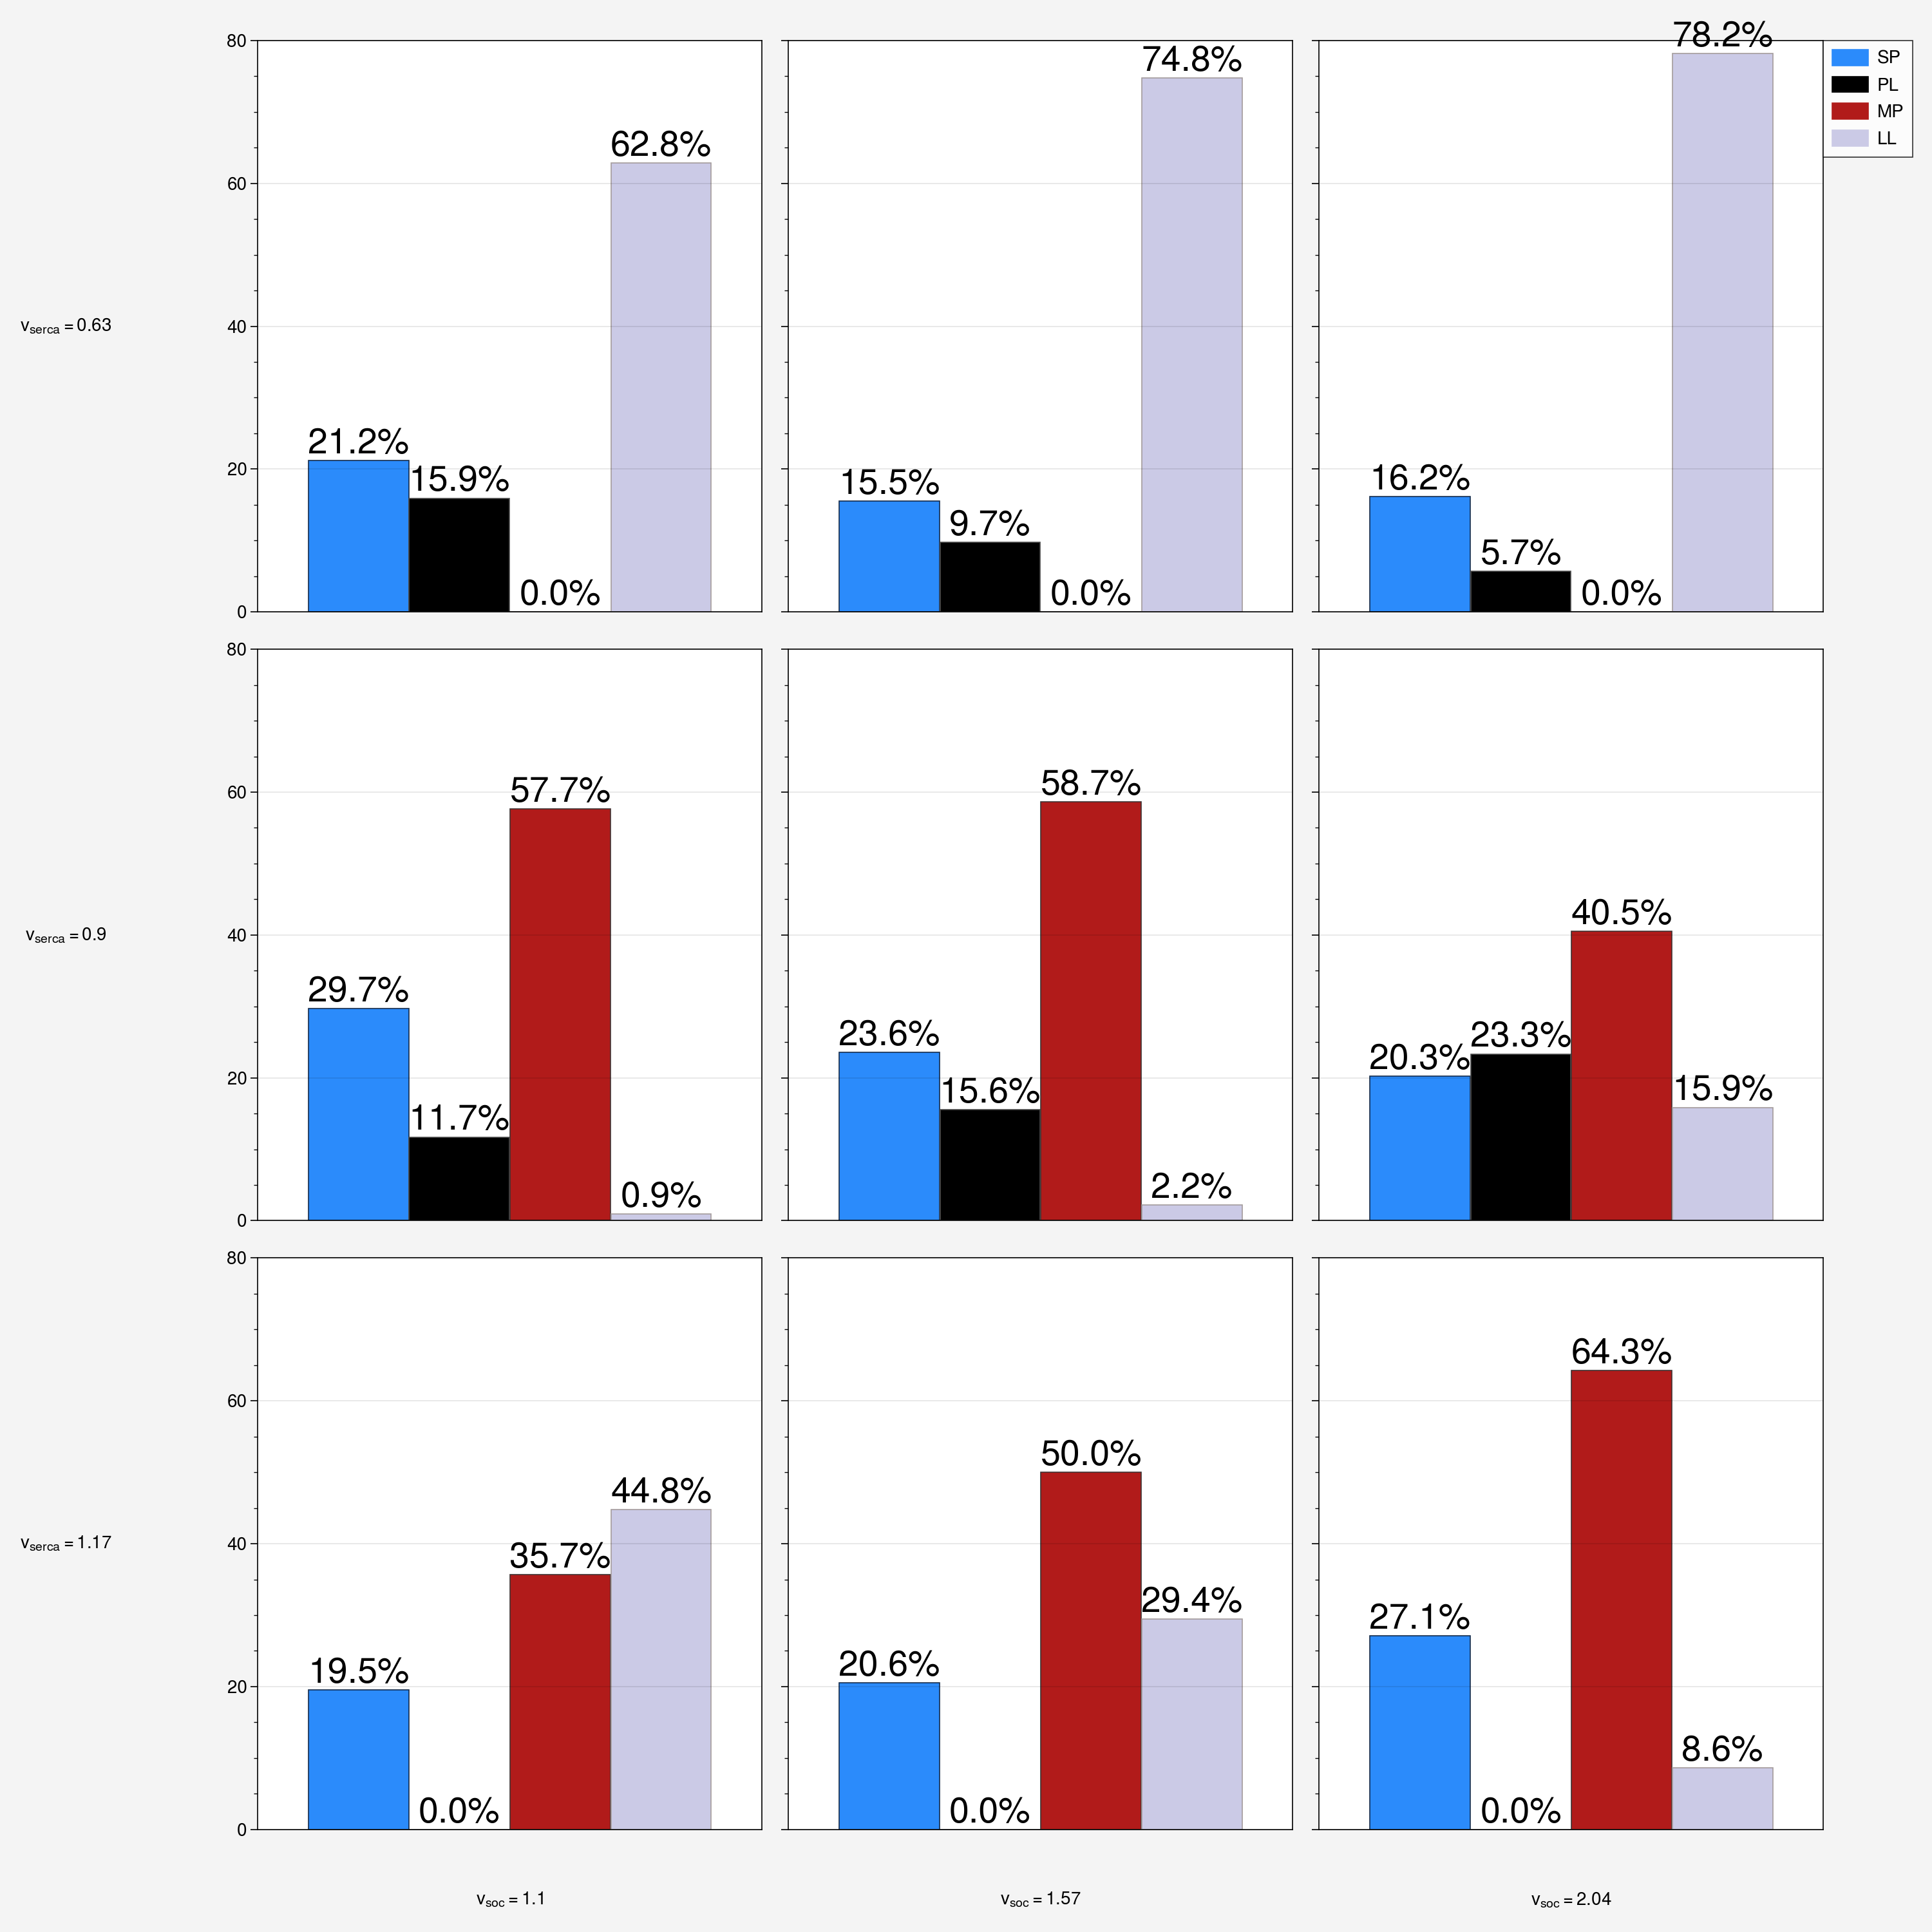

In [ ]:
cfg.v_soc = 1.57
cfg.v_serca = 0.9
cfg.v_pmca = 10.0

multipliers = np.array([0.7, 1.0, 1.3])

conditions = {
    'v_serca': multipliers * cfg.v_serca,
    'v_soc': multipliers * cfg.v_soc,
    'v_pmca': multipliers * cfg.v_pmca
}

folder = 'data/ca_diversity/channels/'

#choose fixed conditions - uncomment two of the conditions
fixed = {
#     'v_soc': cfg.v_soc,
#     'v_serca': cfg.v_serca,
    'v_pmca': cfg.v_pmca * multipliers[1],
#     'v_pmca': cfg.v_pmca
}

#partial labels for each parameter type, insert value after and '$' after that to complete label
partial_labels = {
    'v_soc': 'v$_\mathrm{soc}=',
    'v_serca': 'v$_\mathrm{serca}=',
    'v_pmca': 'v$_\mathrm{pmca}=',
}

cond_types = []
for cond in conditions:
    if cond not in fixed:
        cond_types.append(cond)
        
m = len(conditions[cond_types[0]])
n = len(conditions[cond_types[1]])

fig, ax = plt.subplots(m, n, figsize=(n*5, m*5), sharey=True)

for i in range(m):
    for j in range(n):
        for cond in fixed:
            setattr(cfg, cond, fixed[cond])
        
        cond = cond_types[0]
#         setattr(cfg, cond, conditions[cond][m-i-1])
        setattr(cfg, cond, conditions[cond][i])
        cond = cond_types[1]
        setattr(cfg, cond, conditions[cond][j])
        
        file = 'vsoc_{}_vserca_{}_vpmca_{}'.format(cfg.v_soc, cfg.v_serca, cfg.v_pmca)
        
        results = pd.read_pickle(folder + file)
        
        if i == 0 and j == n-1:
            diversity_barchart(results, ax=ax[i, j], legend=True, bbox_to_anchor=(1, 1), loc='upper left', ylim=80)
        else:
            diversity_barchart(results, ax=ax[i, j], legend=False, ylim=80)

for i in range(m):
#     ax[i, 0].set_ylabel(partial_labels[cond_types[0]] + str(round(conditions[cond_types[0]][m-i-1], 2)) + '$', 
#                        rotation=0, ha='center', va='center', labelpad=70)
    ax[i, 0].set_ylabel(partial_labels[cond_types[0]] + str(round(conditions[cond_types[0]][i], 2)) + '$', 
                       rotation=0, ha='center', va='center', labelpad=90)

for j in range(n):
    ax[m-1, j].set_xlabel(partial_labels[cond_types[1]] + str(round(conditions[cond_types[1]][j], 2)) + '$',
                         labelpad=30)
        
plt.tight_layout()

plt.savefig(diversity_fig_folder + 'ip3_param_spread_confirmation', bbox_inches='tight')

cfg.v_soc = 1.57
cfg.v_serca = 0.9
cfg.v_pmca = 10.0

## Effects of feedbacks and Gd1/Gd2

### Feedback

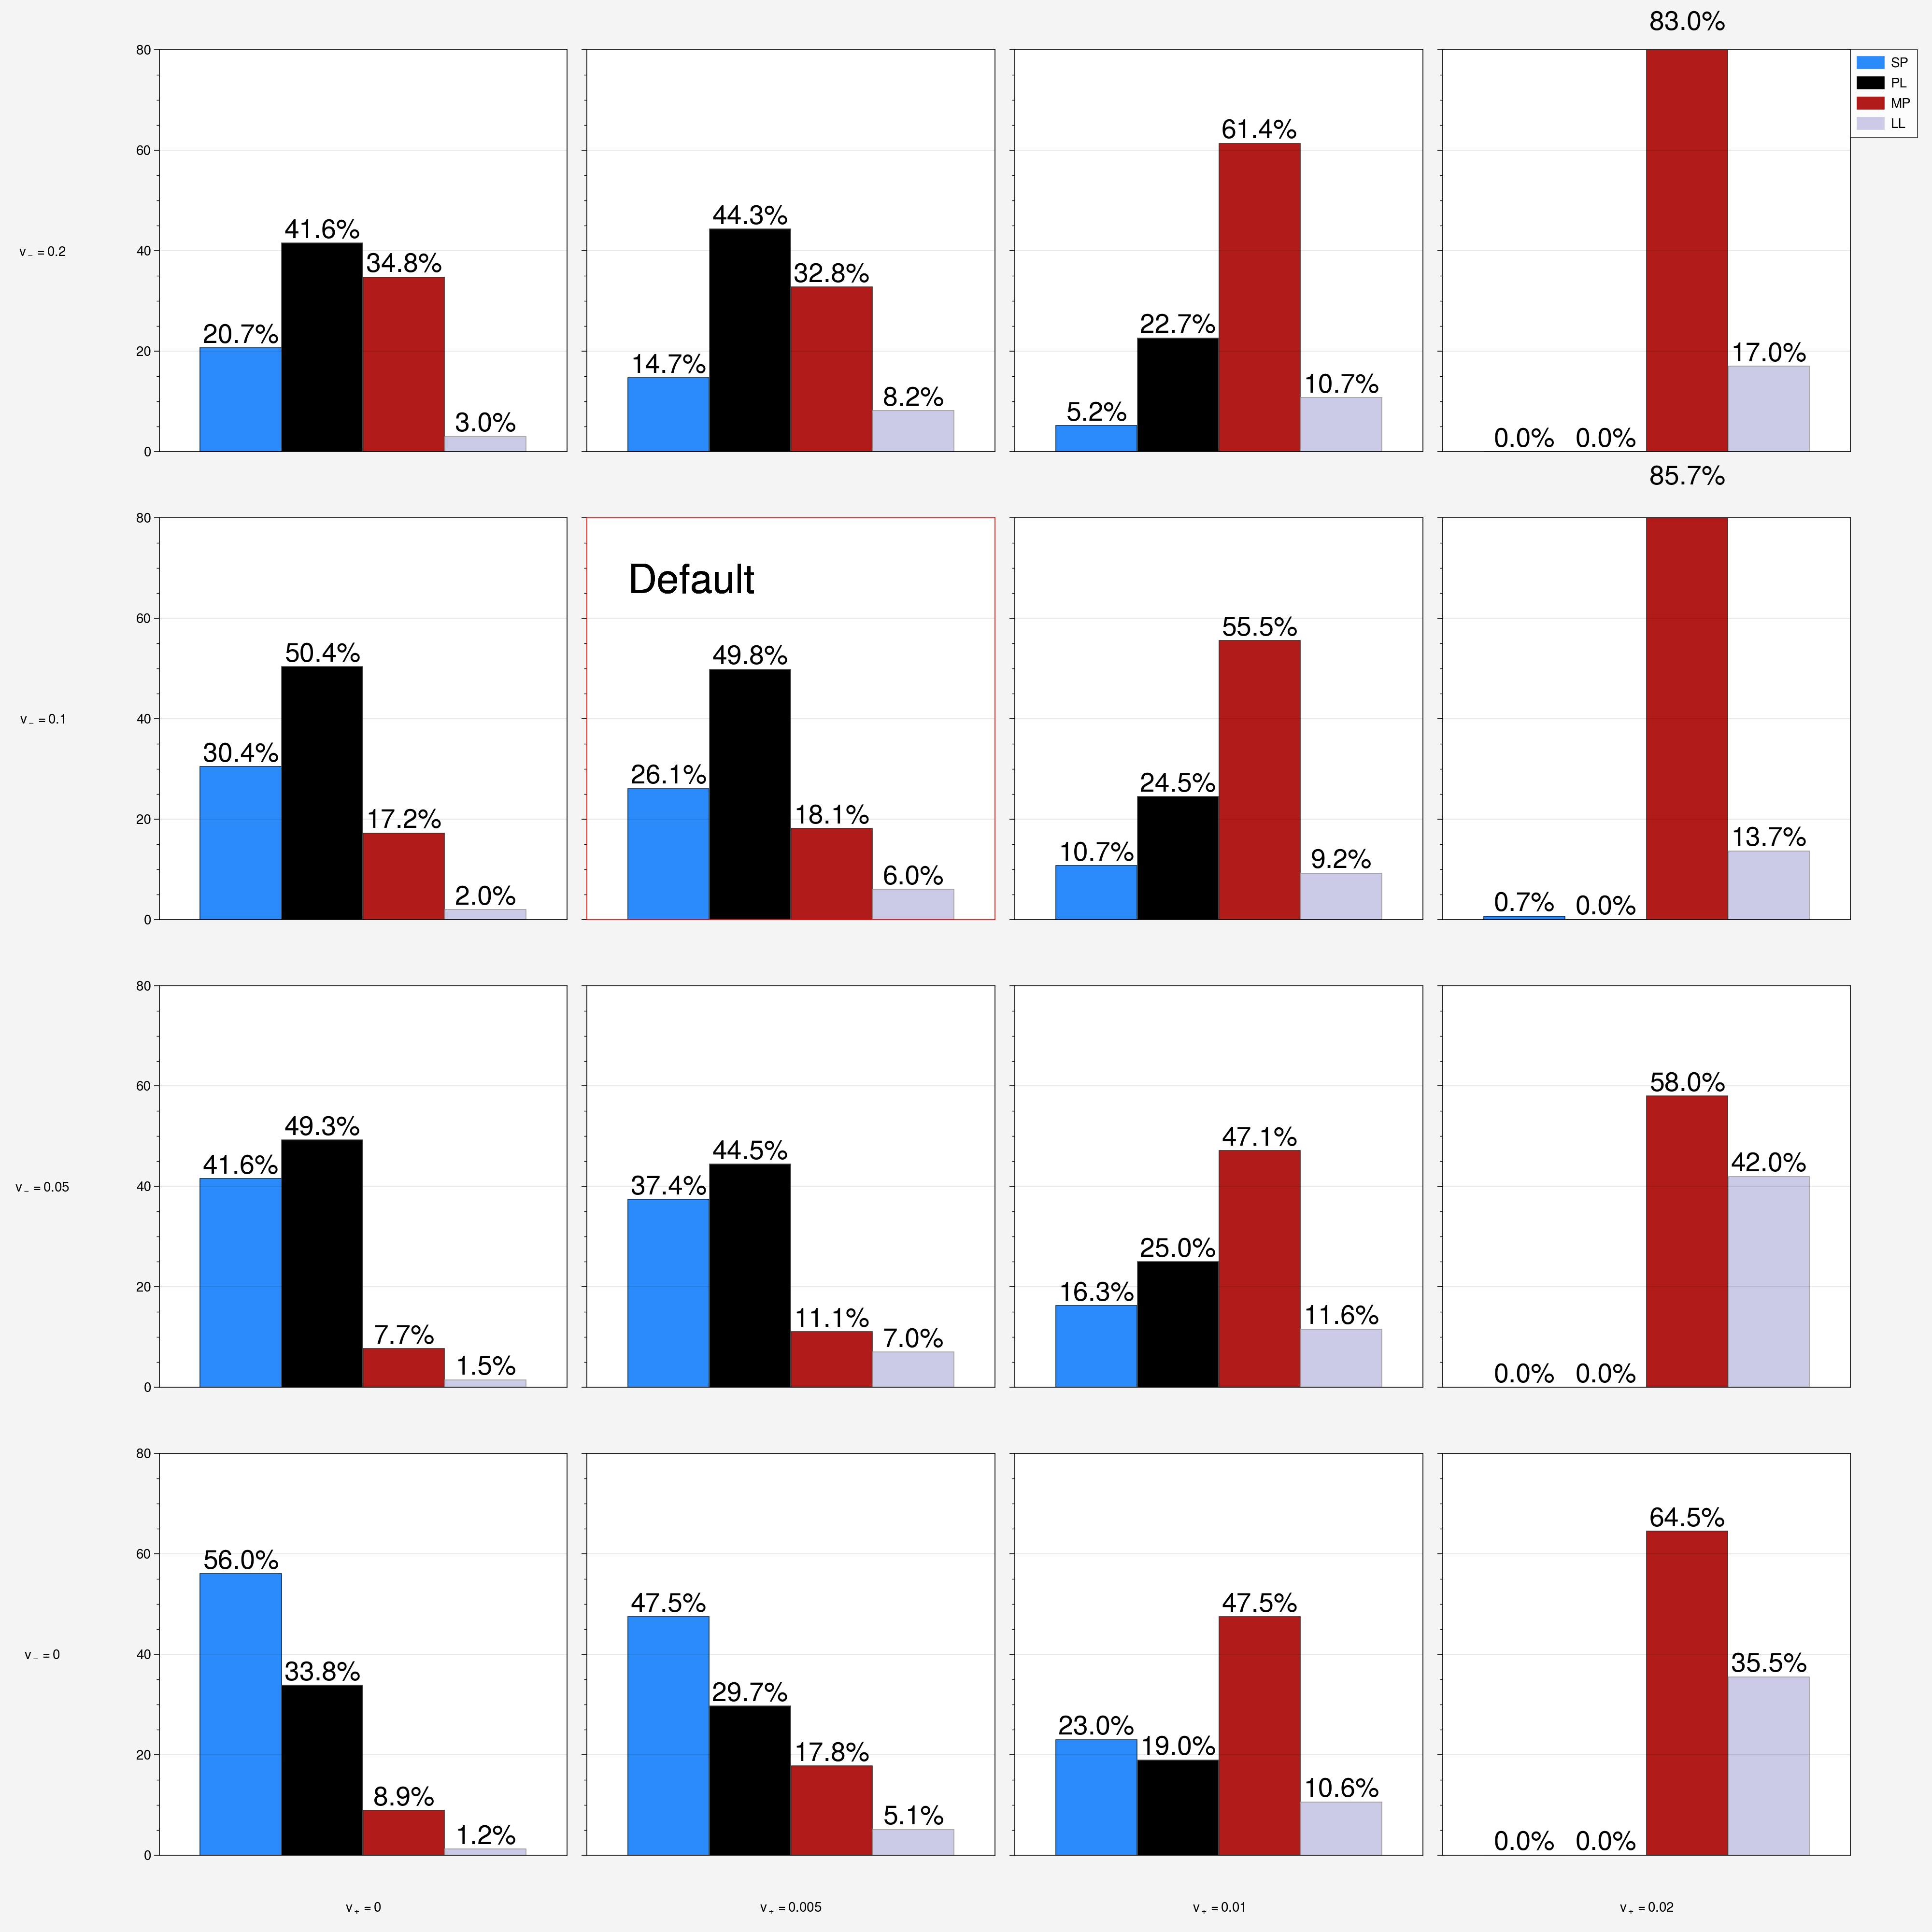

In [9]:
conditions = {
    'kd1': [0, 0.02, 0.04],
    'kd2': [0, 0.6, 1.2],
    'v_3k': [0, 0.05, 0.1, 0.2],
    'v_delta': [0, 0.005, 0.01, 0.02],
}

folder = 'data/ca_diversity/calibrated/'

#choose fixed conditions - uncomment two of the conditions
fixed = {
    'kd1': 0.02,
    'kd2': 1.2,
#     'v_3k': 0.1,
#     'v_delta': 0.005
}

#partial labels for each parameter type, insert value after and '$' after that to complete label
partial_labels = {
    'kd1': 'k$_d1=',
    'kd2': 'k$_d2=',
    'v_3k': 'v$_-=',
    'v_delta': 'v$_+=',
}

cond_types = []
for cond in conditions:
    if cond not in fixed:
        cond_types.append(cond)
        
m = len(conditions[cond_types[0]])
n = len(conditions[cond_types[1]])

fig, ax = plt.subplots(m, n, figsize=(n*5, m*5), sharey=True)

for i in range(m):
    for j in range(n):
        for cond in fixed:
            setattr(cfg, cond, fixed[cond])
        
        cond = cond_types[0]
        setattr(cfg, cond, conditions[cond][m-i-1])
        cond = cond_types[1]
        setattr(cfg, cond, conditions[cond][j])
        
        file = 'kd1_{}_kd2_{}_v3k_{}_vdelta_{}'.format(cfg.kd1, cfg.kd2, cfg.v_3k, cfg.v_delta)
        
        results = pd.read_pickle(folder + file)
        
        if i == 0 and j == n-1:
            diversity_barchart(results, ax=ax[i, j], legend=True, bbox_to_anchor=(1, 1), loc='upper left', ylim=80)
        else:
            diversity_barchart(results, ax=ax[i, j], legend=False, ylim=80)

for i in range(m):
    ax[i, 0].set_ylabel(partial_labels[cond_types[0]] + str(conditions[cond_types[0]][m-i-1]) + '$', 
                       rotation=0, ha='center', va='center', labelpad=70)
for j in range(n):
    ax[m-1, j].set_xlabel(partial_labels[cond_types[1]] + str(conditions[cond_types[1]][j]) + '$',
                         labelpad=30)
        
spines = ['top', 'bottom', 'left', 'right']
for spine in spines:
    ax[1, 1].spines[spine].set_color('red')
    ax[1, 1].text(-0.5, 65, 'Default', size=30)
        
plt.tight_layout()
# plt.savefig(fig_folder + 'feedback_effects', bbox_inches='tight')

### Gd1, Gd2

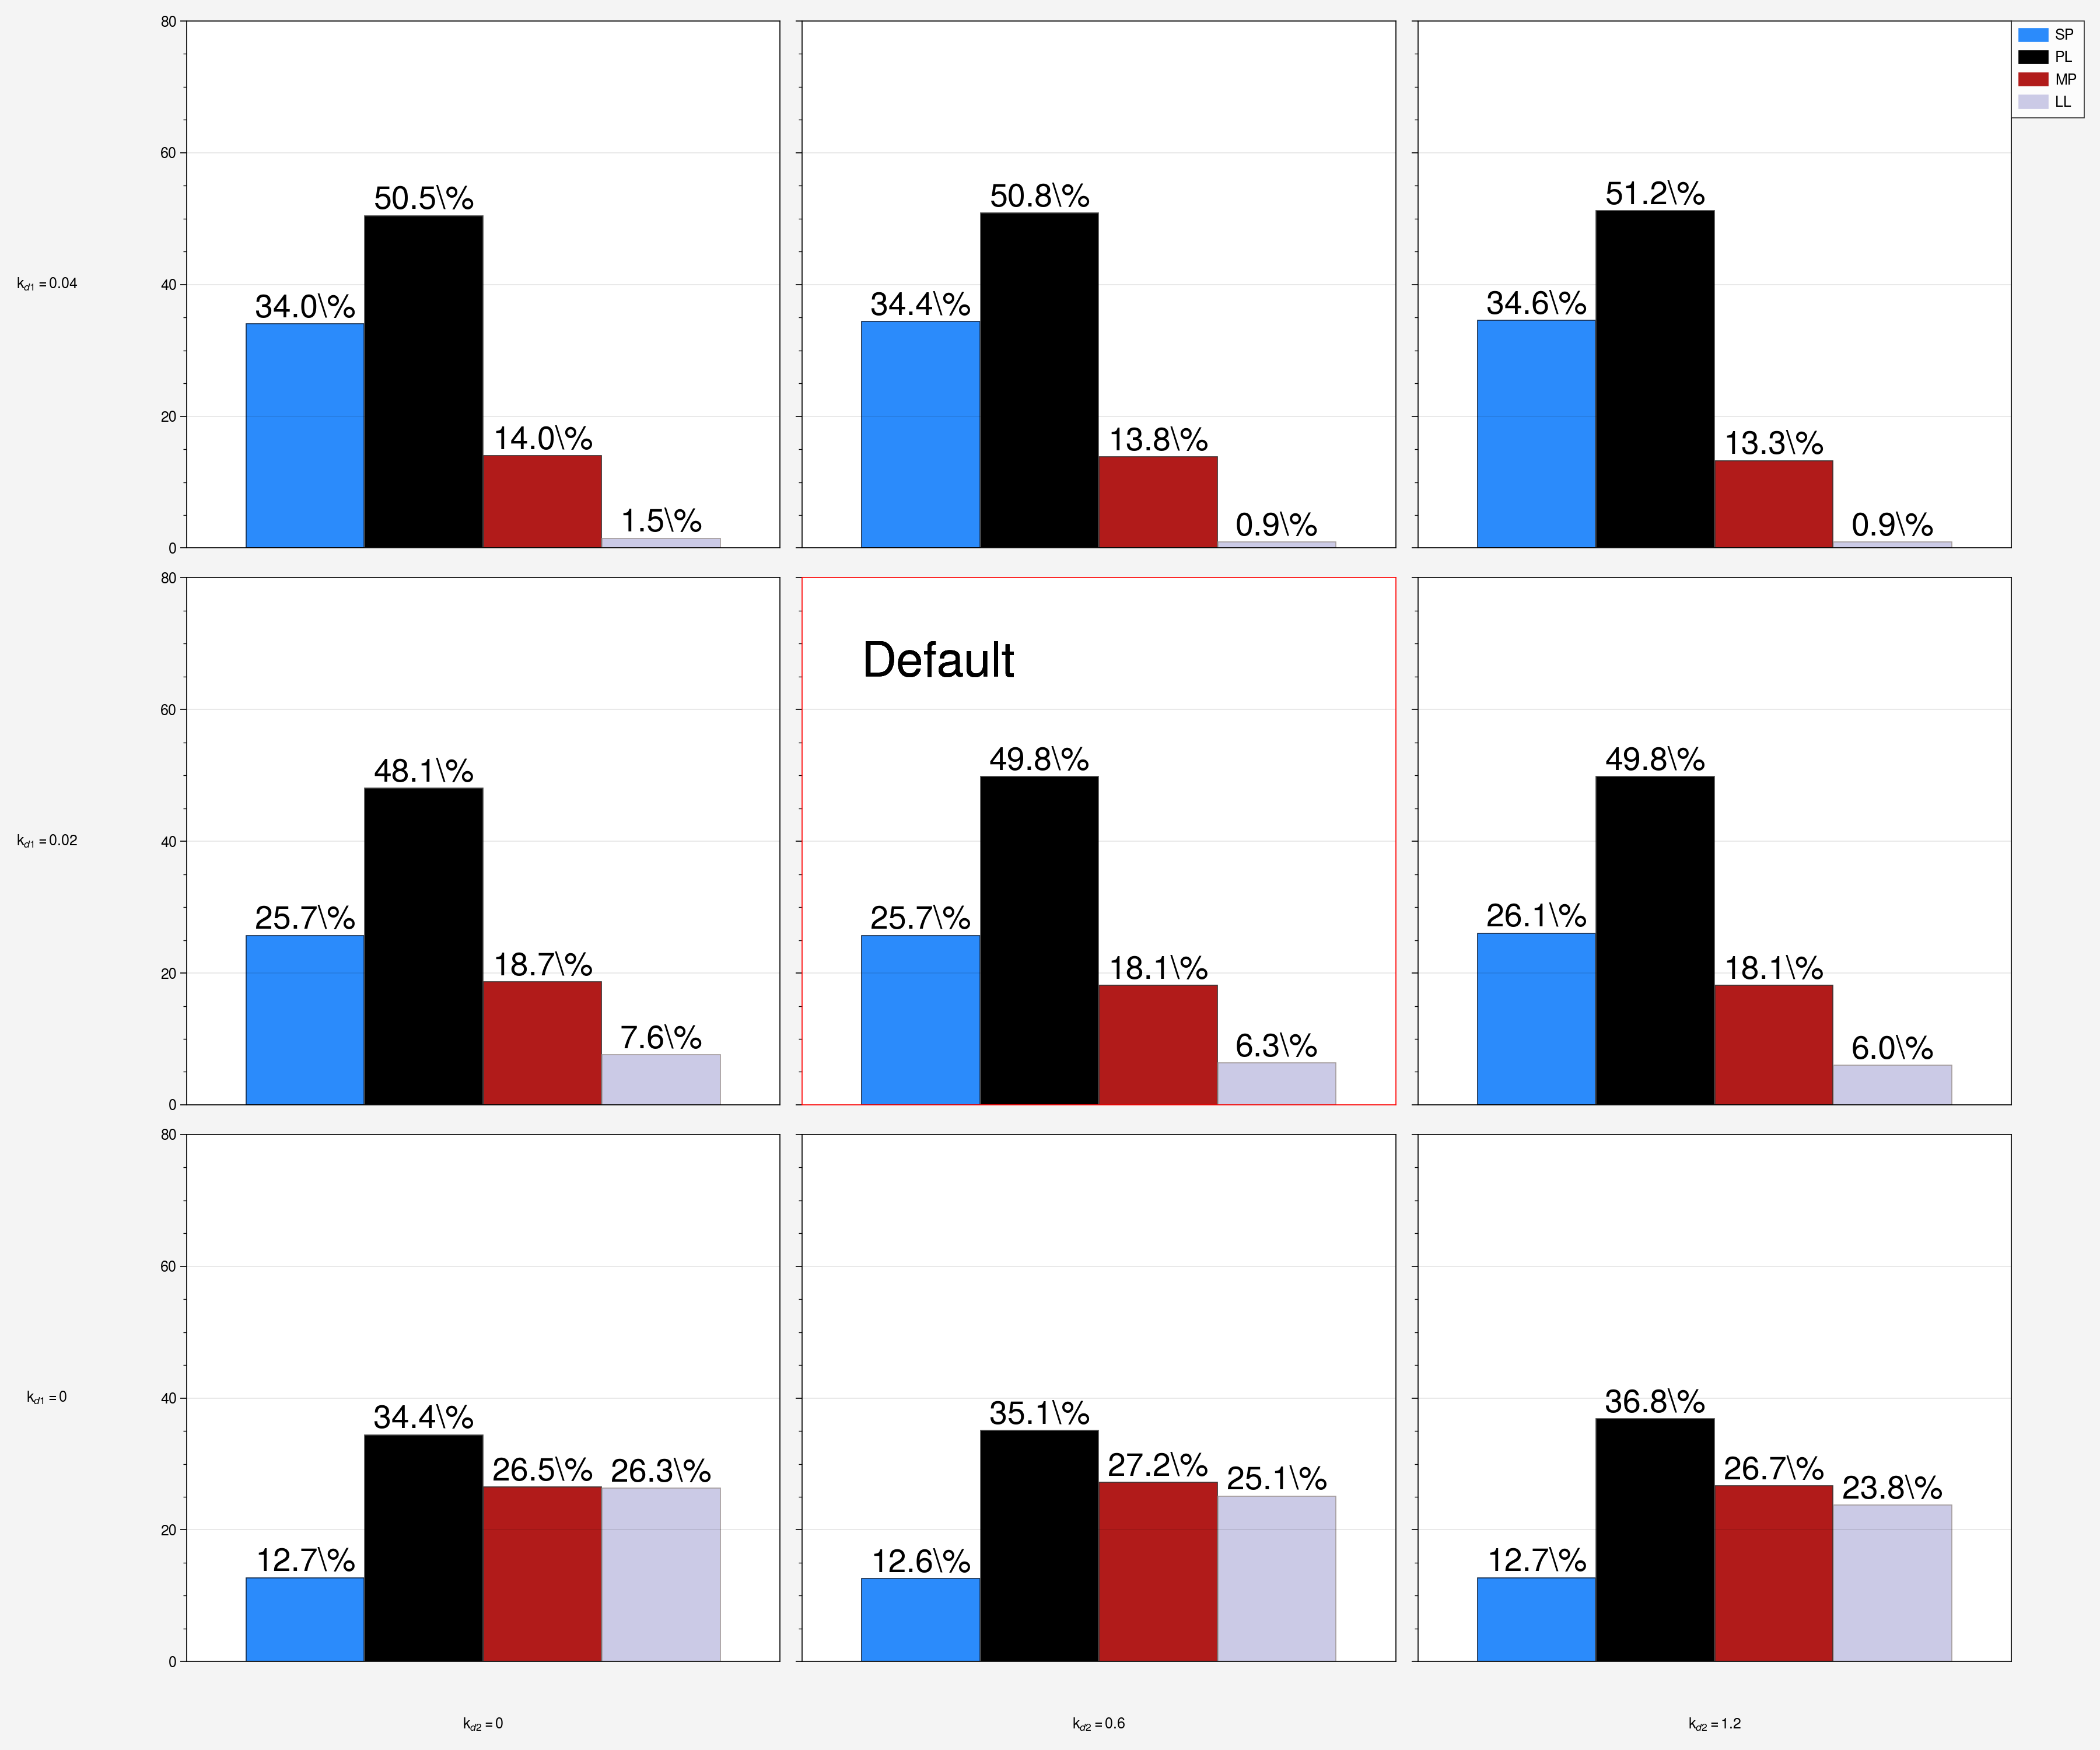

In [ ]:
conditions = {
    'kd1': [0, 0.02, 0.04],
    'kd2': [0, 0.6, 1.2],
    'v_3k': [0, 0.05, 0.1, 0.2],
    'v_delta': [0, 0.005, 0.01, 0.02],
}

folder = 'data/ca_diversity/calibrated/'

#choose fixed conditions - uncomment two of the conditions
fixed = {
#     'kd1': 0.02,
#     'kd2': 0.6,
    'v_3k': 0.1,
    'v_delta': 0.005
}

#partial labels for each parameter type, insert value after and '$' after that to complete label
partial_labels = {
    'kd1': 'k$_{d1}=',
    'kd2': 'k$_{d2}=',
    'v_3k': 'v$_-=',
    'v_delta': 'v$_+=',
}

cond_types = []
for cond in conditions:
    if cond not in fixed:
        cond_types.append(cond)
        
m = len(conditions[cond_types[0]])
n = len(conditions[cond_types[1]])

fig, ax = plt.subplots(m, n, figsize=(n*6, m*5), sharey=True)

for i in range(m):
    for j in range(n):
        for cond in fixed:
            setattr(cfg, cond, fixed[cond])
        
        cond = cond_types[0]
        setattr(cfg, cond, conditions[cond][m-i-1])
        cond = cond_types[1]
        setattr(cfg, cond, conditions[cond][j])
        
        file = 'kd1_{}_kd2_{}_v3k_{}_vdelta_{}'.format(cfg.kd1, cfg.kd2, cfg.v_3k, cfg.v_delta)
        
        results = pd.read_pickle(folder + file)
        
        if i == 0 and j == n-1:
            diversity_barchart(results, ax=ax[i, j], legend=True, bbox_to_anchor=(1, 1), loc='upper left', ylim=80)
        else:
            diversity_barchart(results, ax=ax[i, j], legend=False, ylim=80)

for i in range(m):
    ax[i, 0].set_ylabel(partial_labels[cond_types[0]] + str(conditions[cond_types[0]][m-i-1]) + '$', 
                       rotation=0, ha='center', va='center', labelpad=70)
for j in range(n):
    ax[m-1, j].set_xlabel(partial_labels[cond_types[1]] + str(conditions[cond_types[1]][j]) + '$',
                         labelpad=30)
        
spines = ['top', 'bottom', 'left', 'right']
for spine in spines:
    ax[1, 1].spines[spine].set_color('red')
    ax[1, 1].text(-0.5, 65, 'Default', size=30)

        
plt.tight_layout()
plt.savefig(fig_folder + 'desensitization_effects', bbox_inches='tight')

# Examining Individual Classification Results to look at validity of classification algorithm

## Visualize a bunch of same calcium response types

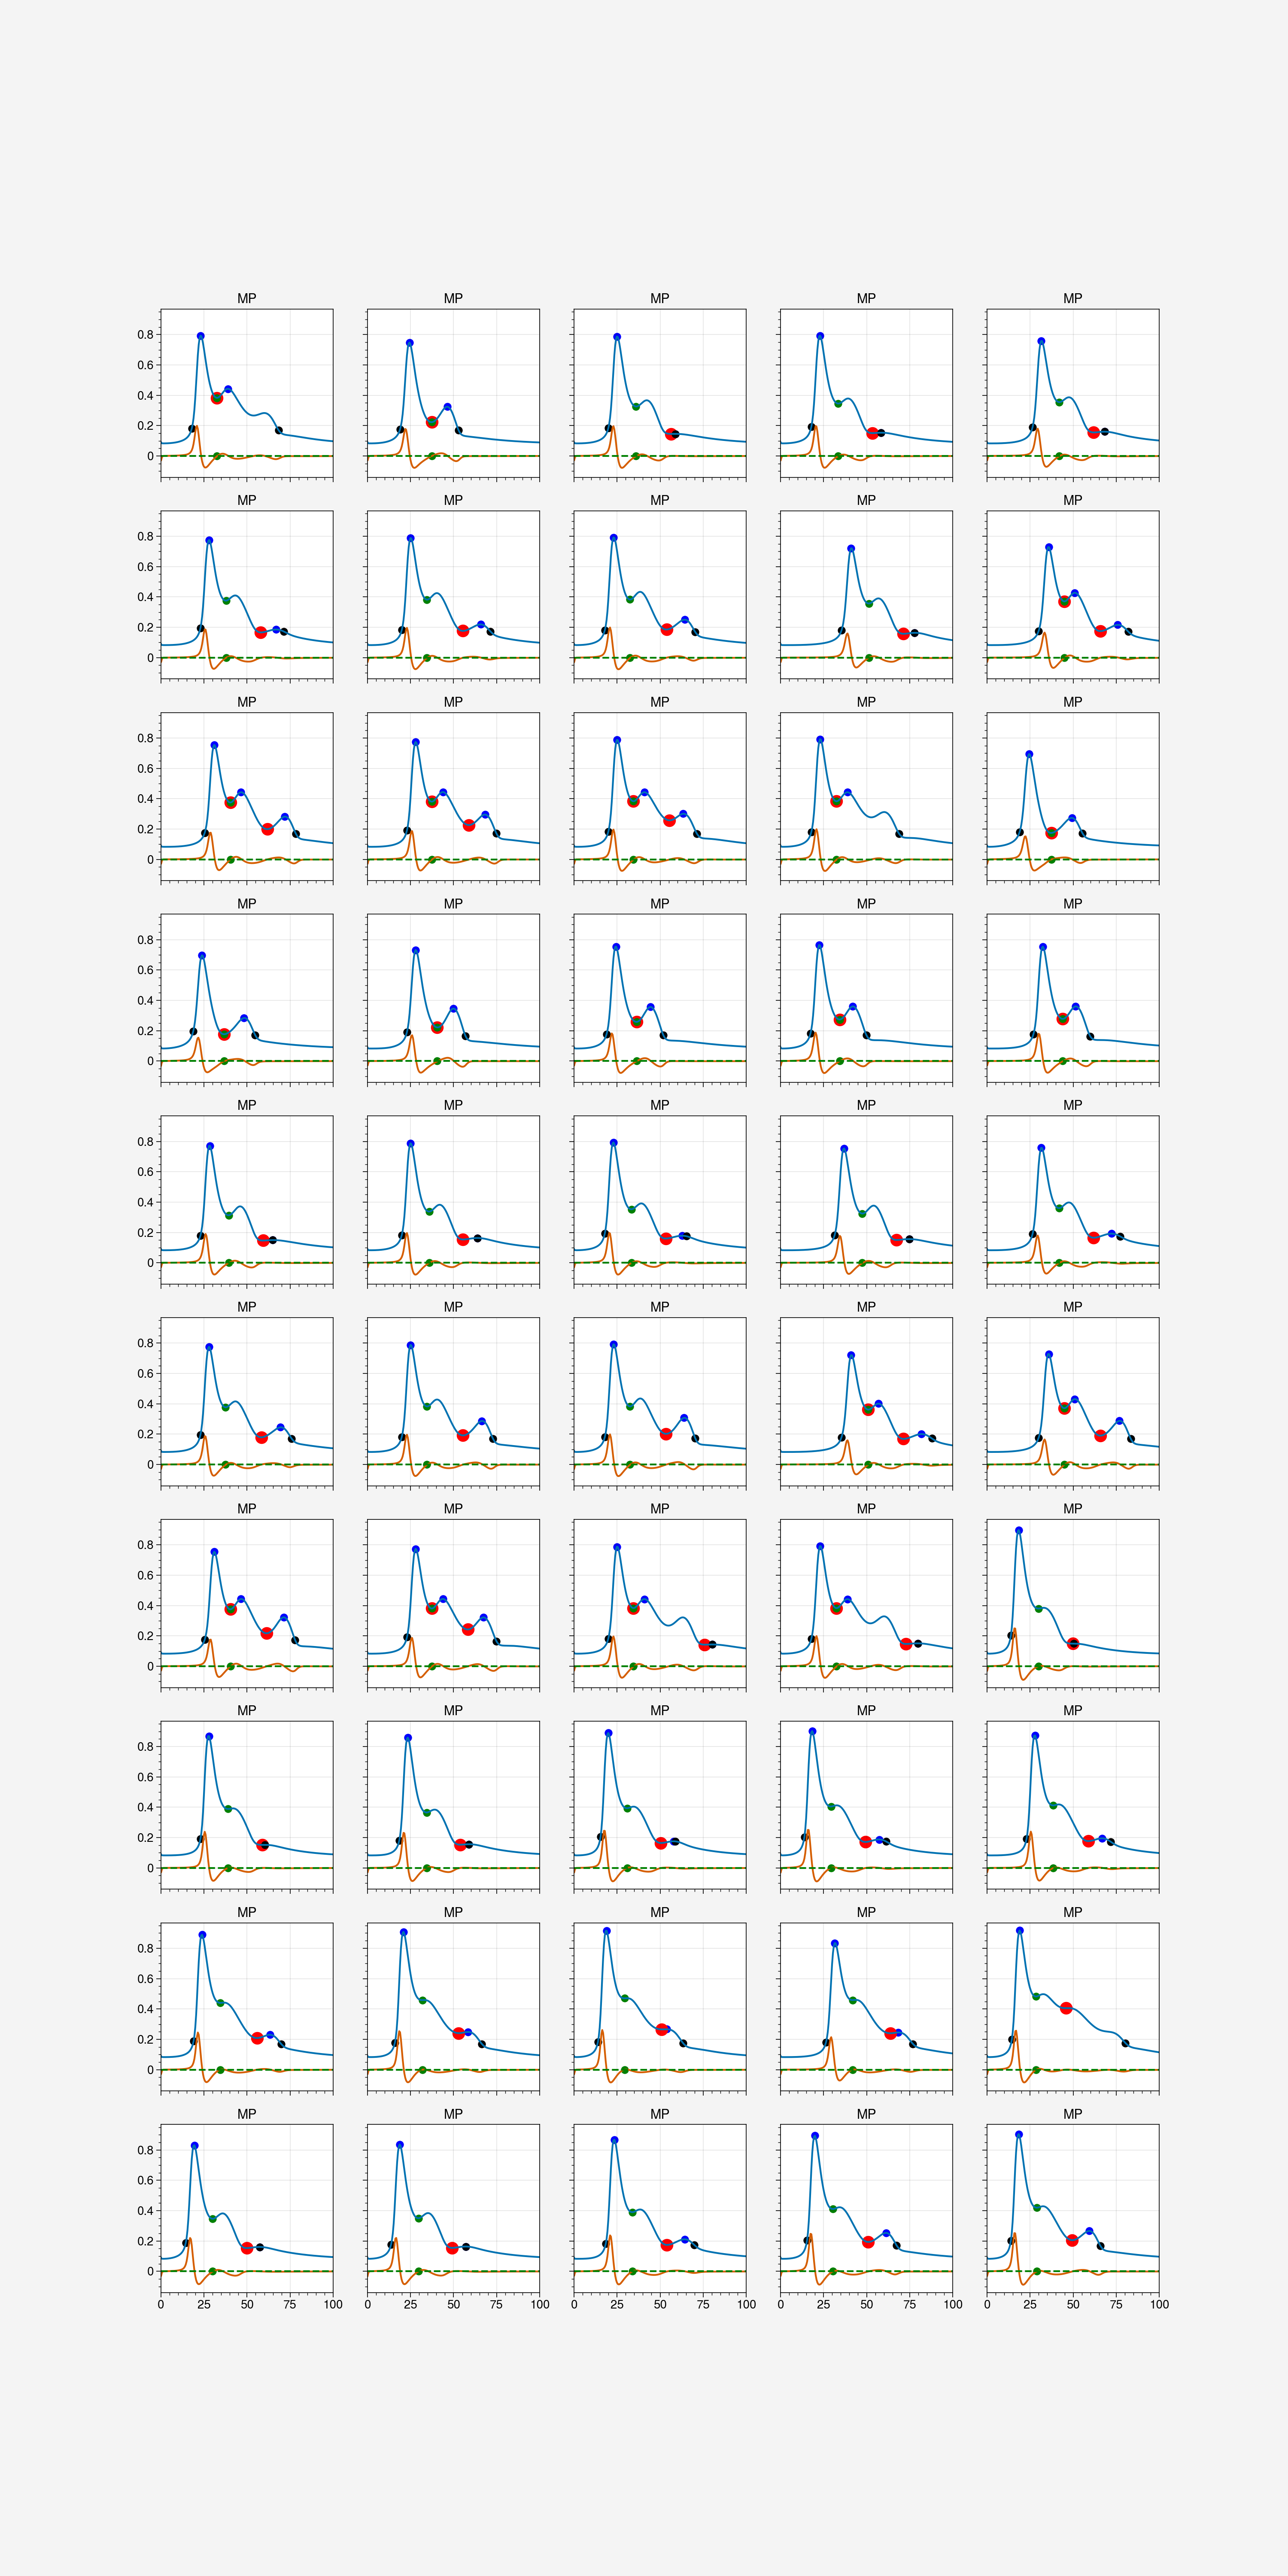

In [10]:
# file = 'vsoc_{}_vserca_{}_vpmca_{}'.format(1.57, 0.9, 10.0)
# file = 'serca_0.5'
# file = 'soc_0'
# results = pd.read_pickle(folder + file)

# results = pd.read_pickle('data/ca_diversity/calibrated/kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0.005')
# results = c_tot_res[-1]
# results = res_df


results = pd.read_pickle('data/ca_diversity/blocking/default')
r = results[results['response_type'] == 'MP']
offset = 40
fig, ax = plt.subplots(10, 5, figsize=(15, 30), sharey=True, sharex=True)
for i in range(offset, min(50+offset, len(r))):
    
    n = (i-offset) % 5
    m = int(np.floor((i-offset) / 5))
    
    t = r.iloc[i]['t']
    c = r.iloc[i]['c']
    vis_dict = visualize_classification(t, c, verbose=False, ret=True, ax=ax[m,n], peak_priority=True)
    ax[m,n].set_title(vis_dict['result'])
    ax[m,n].set_xlim([0, 100])
    
    


## Visualize a single response to see in detail how it was classified

First peak: (29.32474787743552, 0.6275539951448849)
Trough found at <50% height of prev peak: (39.82474787743552, 0.13198954632297968)
Next peak found tall enough: (55.32474787743552, 0.3556169723125696)


At least 2 valid peaks
MP


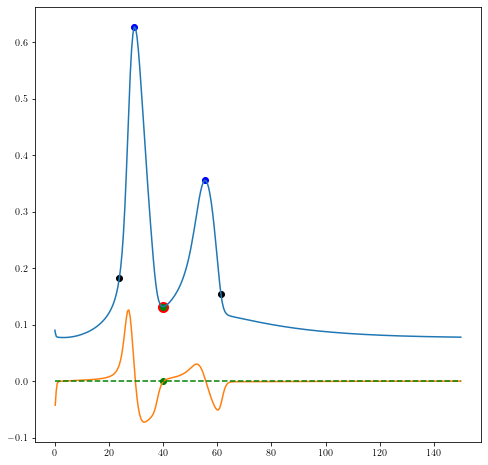

In [104]:
results = pd.read_pickle('data/ca_diversity/calibrated/kd1_0.02_kd2_1.2_v3k_0.1_vdelta_0.005')
r = results[results['response_type'] == 'MP']

idx = 9
t, c = r.iloc[idx]['t'], r.iloc[idx]['c']
visualize_classification(t, c, peak_priority=True)